<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# init an empty list var
raw_data = []

# open using Python 'open' -- file opened as 'read'
with open('sat_scores.csv', 'r') as file:
    reader = csv.reader(file)                # assign file content using reader method
    for row in reader:                       # Loop through rows and append each to raw_data list
        raw_data.append(row)
        
file.close()                                 # Finished with CSV, close it

In [3]:
# Check length of raw data. 
print(len(raw_data))

53


### Rus' Notes:
- 53 rows in raw data.
- expected a header row and 50 states, so length longer than expectation.


In [4]:
#check top and last row
print(raw_data[0], raw_data[-1])

['State', 'Rate', 'Verbal', 'Math'] ['All', '45', '506', '514']


In [5]:
# create state list from file
state_list = [raw_data[x][0] for x in range(1,len(raw_data))]

#US states from the internet
us_states = ['AK','AL','AR','AZ','CA','CO','CT','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY',
             'LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY',
             'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']
# check whether all states present in raw_data
for i in range(len(raw_data)-1):
    if state_list[i] not in us_states:
        print(state_list[i])            # print out any additional "states"

DC
All


### Rus' Notes:
- Last row appears to be a total count and is superfluous to assessment. Can be removed.
- Appears additional data point for Washington DC, so 51 'states' expected in the data.

In [6]:
# init a dictionary
states = {}

# Loop over each "column" in the raw data; assign 0th rw as dict key, loop comp over remaining row elements in raw data 
# to add col data to key values. Loop comprehension limited to skip last superfluous row.
for x in range(4):
    states[raw_data[0][x]] = [raw_data[row][x] for row in range(1,52)]

print(states)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566'], 'Math': ['5

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [7]:
# create a Pandas DF from the dictionary created through opening the CSV
df_from_dict = pd.DataFrame(states)
df_from_dict.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [8]:
# Check the data types
df_from_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [9]:
# Load in CSV data using the mighty Pandas. Only grab the 51 rows of useful data, i.e. skip the total 'All' row at the end
df_pandas = pd.read_csv('sat_scores.csv',nrows=51)
df_pandas.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [10]:
# Check the data types
df_pandas.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### Rus' Notes:
- The data types when loaded in through the Python `open` method are all `object` types. All values are treated non-numerically and stored as `str` types.
- The data types when loaded through Pandas however account for the numerical values and store numbers as `int`.
- Suggests that data type conversion would need to be considered if/when loading in data through the `open csv` methods.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
# First 10 rows of the DF loaded through Pandas
df_pandas.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### Rus' Notes:
- The data appears to describe the following for each US state (including DC);
    - The percentage of students taking the SAT;
    - The average student score on the 'Verbal' test; and
    - The average student score on the 'Math' test.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
# rename DF from pandas to more useful name for further assessment
df_sat = df_pandas.copy()

In [13]:
df_sat.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [14]:
# data dictionary for reference to the contents 

data_dict = {
    'State':{
        'data_type': df_sat.State.dtype,
        'description': 'US State ID'
    },
    'Rate':{
        'data_type': df_sat.Rate.dtype,
        'description': 'Percentage of students that took SAT'
    },
    'Math':{
        'data_type': df_sat.Math.dtype,
        'description': 'Average maths scores on SAT'
    },
    'Verbal':{
        'data_type': df_sat.Verbal.dtype,
        'description': 'Average verbal scores on SAT'
    },
    'dataset_shape': df_sat.shape    
}

print(data_dict)

{'State': {'data_type': dtype('O'), 'description': 'US State ID'}, 'Rate': {'data_type': dtype('int64'), 'description': 'Percentage of students that took SAT'}, 'Math': {'data_type': dtype('int64'), 'description': 'Average maths scores on SAT'}, 'Verbal': {'data_type': dtype('int64'), 'description': 'Average verbal scores on SAT'}, 'dataset_shape': (51, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

C:\Users\rjnut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


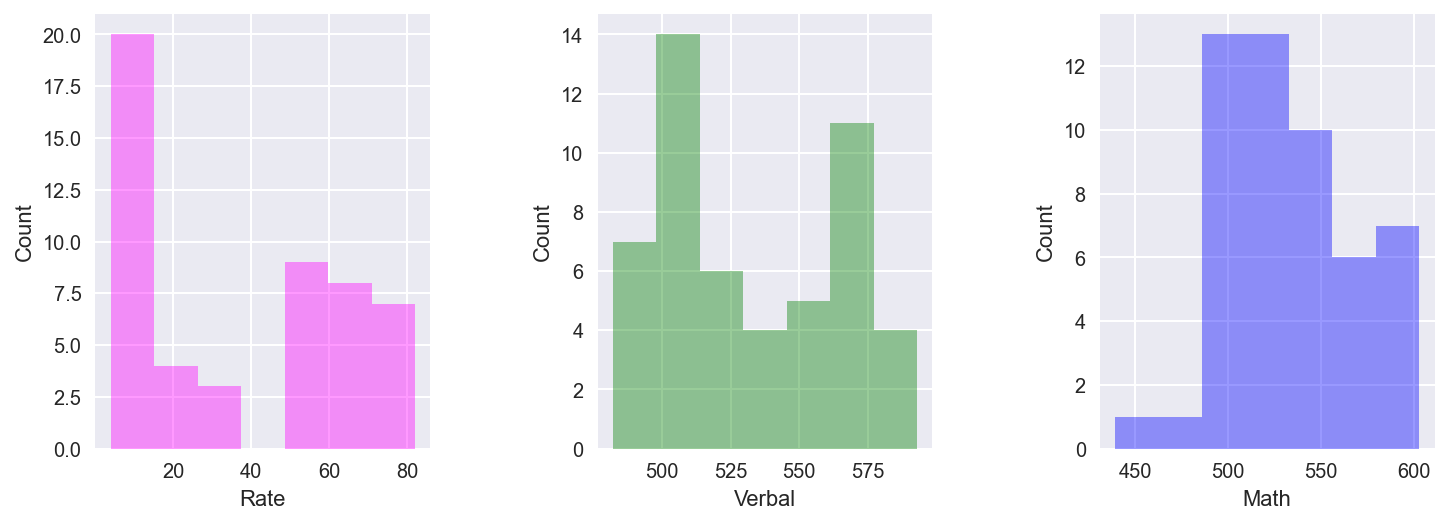

In [16]:
fig, ax = plt.subplots(1,3, figsize=(12,4))           

sns.distplot(df_sat.Rate, kde=False, bins=7, color = '#FF00FF', ax=ax[0])
sns.distplot(df_sat.Verbal, kde=False, bins=7, color = '#008000', ax=ax[1])
sns.distplot(df_sat.Math, kde=False, bins=7, color = '#0000FF', ax=ax[2])


[ax[i].set_ylabel('Count') for i in range(len(ax))]

plt.subplots_adjust(wspace=0.5)     #modify the spacing between the plot
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

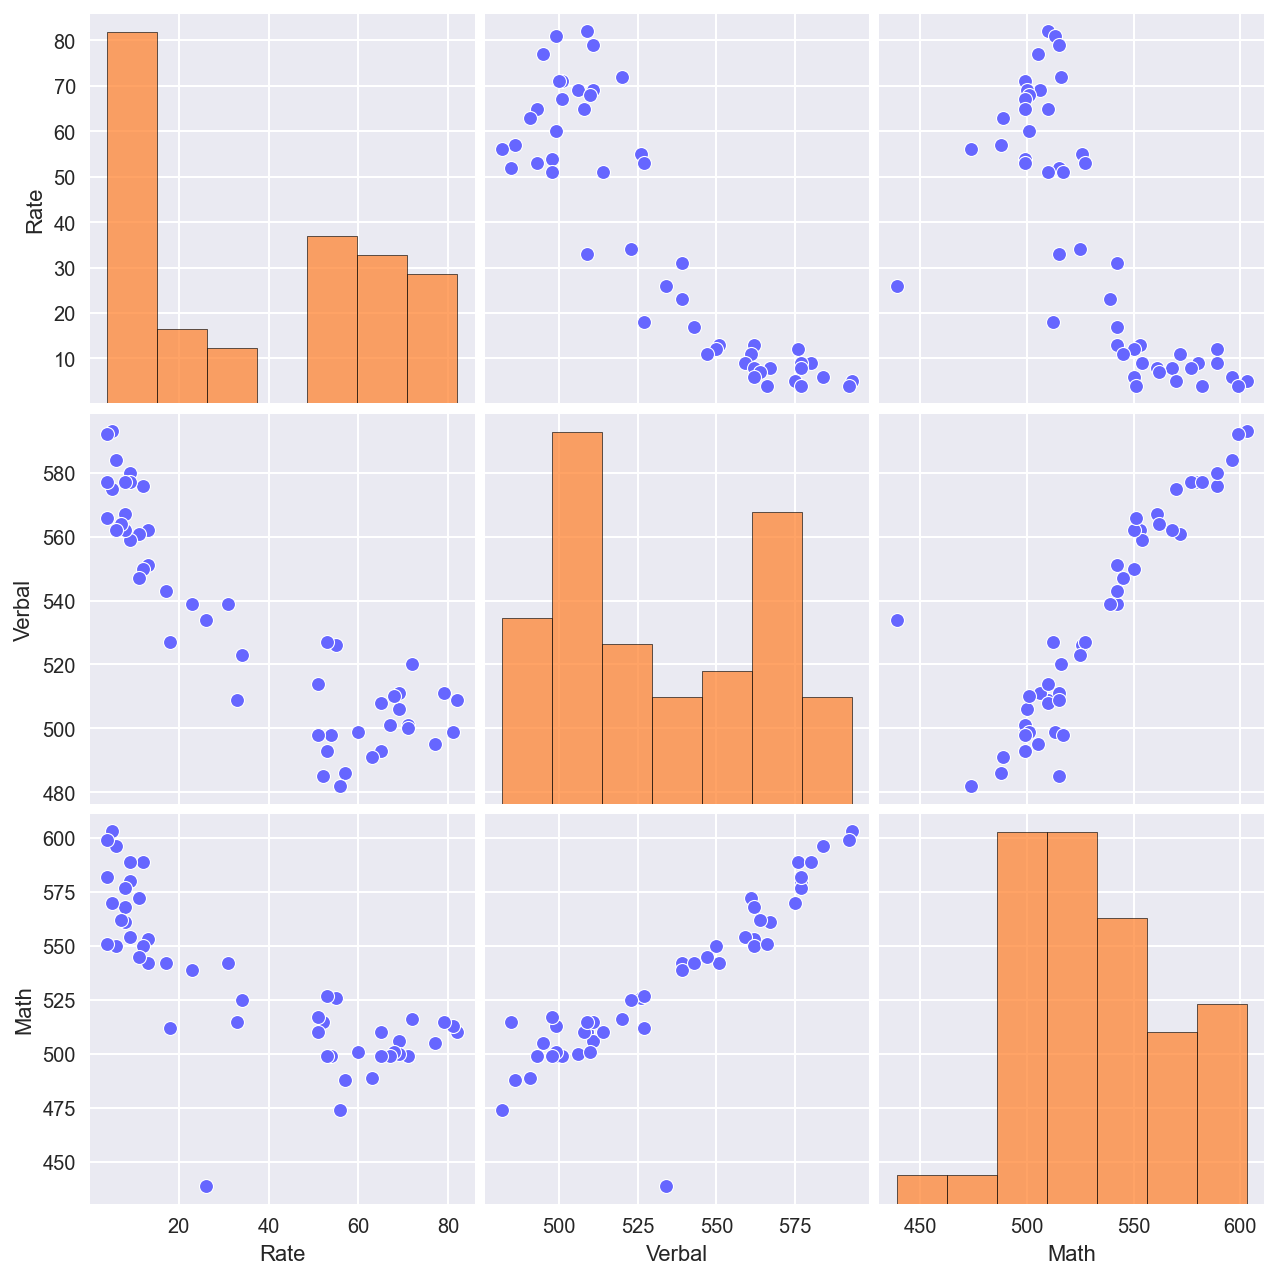

In [17]:
# create a pairplot of the SAT dataset not including the State col
sns.pairplot(
    df_sat.iloc[:,1:4],
    height=3,
    plot_kws={'color': '#6666ff'},
    diag_kws={'color': '#ff8533'},
    corner = False
);

### Rus' Notes:
- the `pairplot` shows a matrix of plots of all variables passed through to the function.
- the diagonal plots are the univariate plots for the columns identifed. These are histograms in the above plot.
- the surrounding plots are bivariate scatter plots showing the relationship between the two variables indicating along the vertical/horizontal axes.
- There is some redundunacy in the bivariate plots as each pair of variables is plotted twice, albeit with the relationship flipped, i.e. `Math`vs`Rate` and `Rate`vs`Math`. These arguably superfluous plots could be skipped by setting `corner = True` in the pairplot function.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

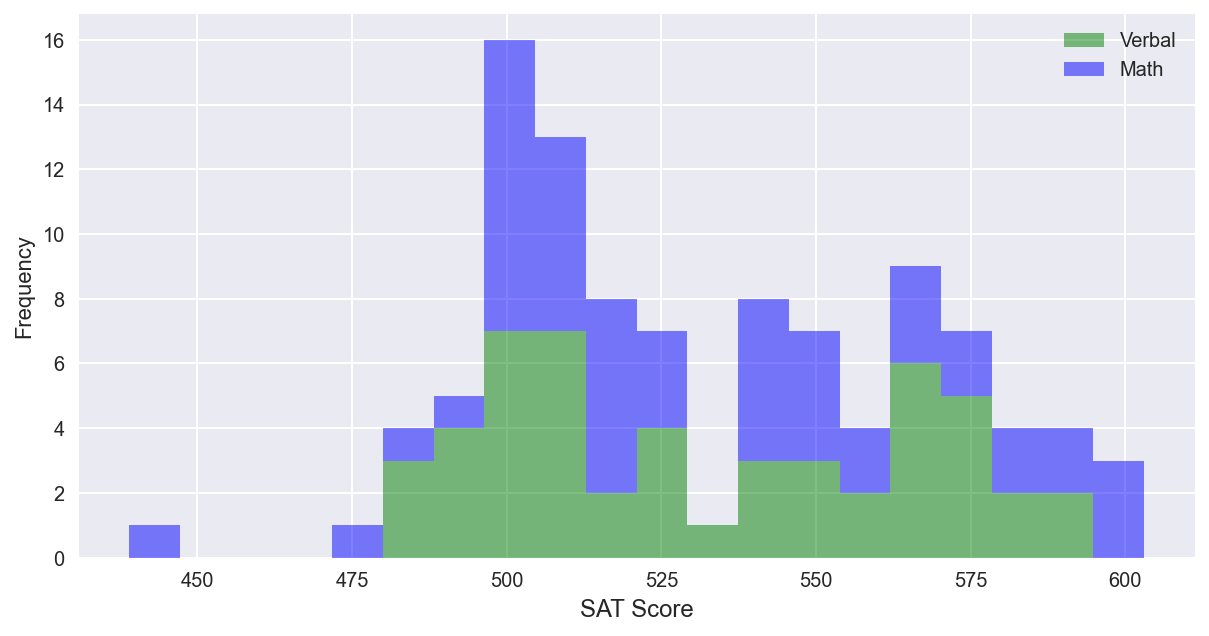

In [18]:
fig = df_sat[['Verbal','Math']].plot(kind='hist', 
                               stacked=True, 
                               figsize=(10,5), 
                               bins=20,
                               alpha=0.5,
                               color={'Verbal':'#008000', 'Math': '#0000FF'}
                              )
# x-axis
fig.set_xlabel('SAT Score',fontsize=12);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

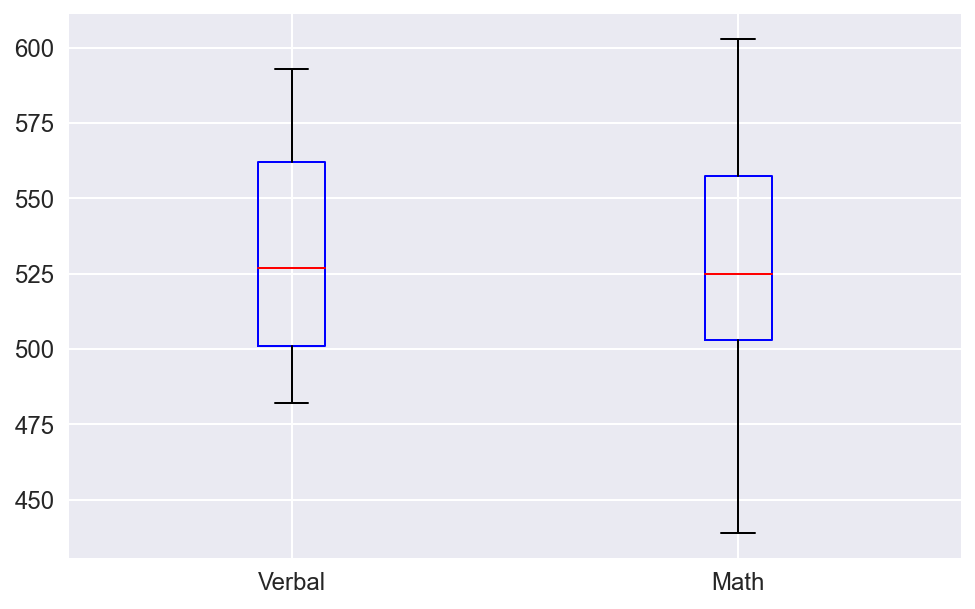

In [19]:
df_sat[['Verbal','Math']].boxplot(figsize=(8,5),
                                  grid=True,
                                  fontsize= 12,
                                  color = {"boxes": "Blue","whiskers": "black","medians": "Red","caps": "Black"}
                                 );

### Rus' Notes:
- Advantages of a Boxplot;
    - these plots include statistical information relating to the data including, median/IQR/Range/outliers.
    - the `notch` parameter could also be used to indicate the confidence intervals on the median values.
    
- Plotting the `Rate` value on the same plot would greatly extend the y-axis as the 'Rate' variable is a different scale to the 'Verbal' and 'Math' score values.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


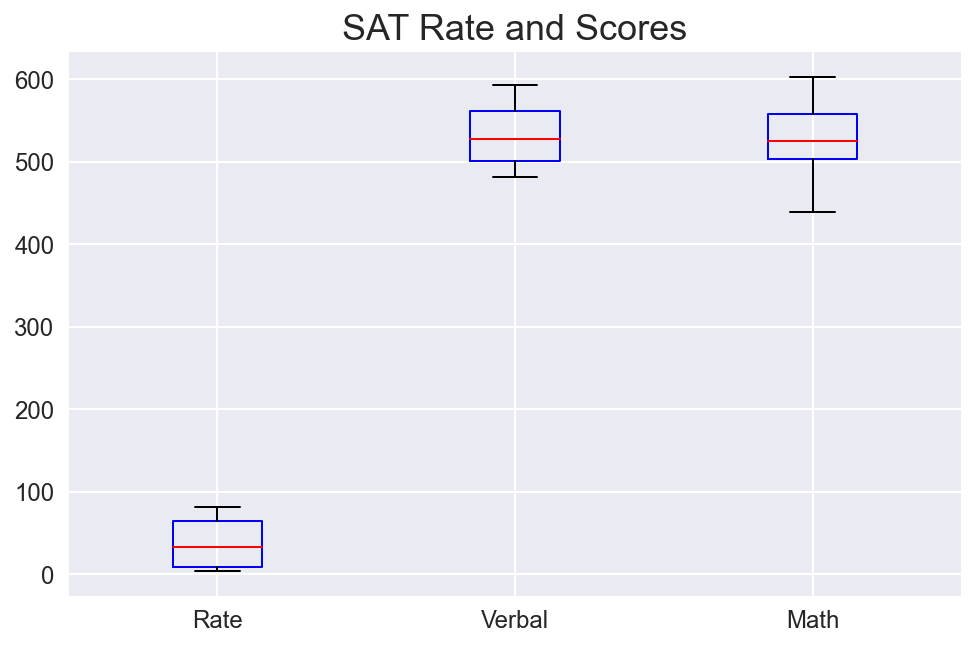

In [20]:
# Boxplot with all the data - not adjusted for variation in scales
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax = df_sat[['Rate','Verbal','Math']].boxplot(grid=True,
                                         fontsize=12,
                                         color={"boxes": "Blue","whiskers": "black","medians": "Red","caps": "Black"}
                                 )
# adjust some plot parameters
ax.set_title('SAT Rate and Scores', fontsize=18)

plt.show();

### Rus' Notes:
- Variables are all on differing scales which makes it difficult to directly compare them.
- Need to standardise the variables such that they can be plotted on the same scale.
- Based on this particular data there are two easy methods to achieve this.

### Method 1:
- The `Rate` variable appears to be the value of the percentage of students in each state that sat the SATs
- The SAT test for each subject has a maximum score of 800 (total combined score out of 1600). 
- The `Verbal` and `Math` scores can be adjusted as a percentage of the maximum score.
- Thus, all variables would be of the same scale; 0-100%

In [21]:
# Copy SAT dataframe prior to modifying
df_sat_adjusted = df_sat.copy()

In [22]:
# convert all Math and Verbal scores to a % of the max score of 800
df_sat_adjusted['Math'] = df_sat_adjusted['Math'].apply(lambda x: x/800 *100 )
df_sat_adjusted['Verbal'] = df_sat_adjusted['Verbal'].apply(lambda x: x/800 *100 )

In [23]:
# Check outcome of conversion
df_sat_adjusted.head()

,State,Rate,Verbal,Math
0,CT,82,63.625,63.750
1,NJ,81,62.375,64.125
2,MA,79,63.875,64.375
3,NY,77,61.875,63.125
4,NH,72,65.000,64.500


In [24]:
df_sat_adjusted.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,66.566176,66.480392
std,27.550681,4.170083,4.535924
min,4.000000,60.250000,54.875000
25%,9.000000,62.625000,62.875000
50%,33.000000,65.875000,65.625000
75%,64.000000,70.250000,69.687500
max,82.000000,74.125000,75.375000


In [25]:
# Create lists of some statistics of interest for inclusion in presentation
means = [round(np.mean(df_sat_adjusted[y]),1) for x,y in enumerate(df_sat_adjusted.columns) if x > 0 ]
medians = [round(np.median(df_sat_adjusted[y]),1) for x,y in enumerate(df_sat_adjusted.columns) if x > 0 ]
iqrs = [round(stats.iqr(df_sat_adjusted[y]),1) for x,y in enumerate(df_sat_adjusted.columns) if x > 0 ]
print(means, medians, iqrs)

[37.0, 66.6, 66.5] [33.0, 65.9, 65.6] [55.0, 7.6, 6.8]


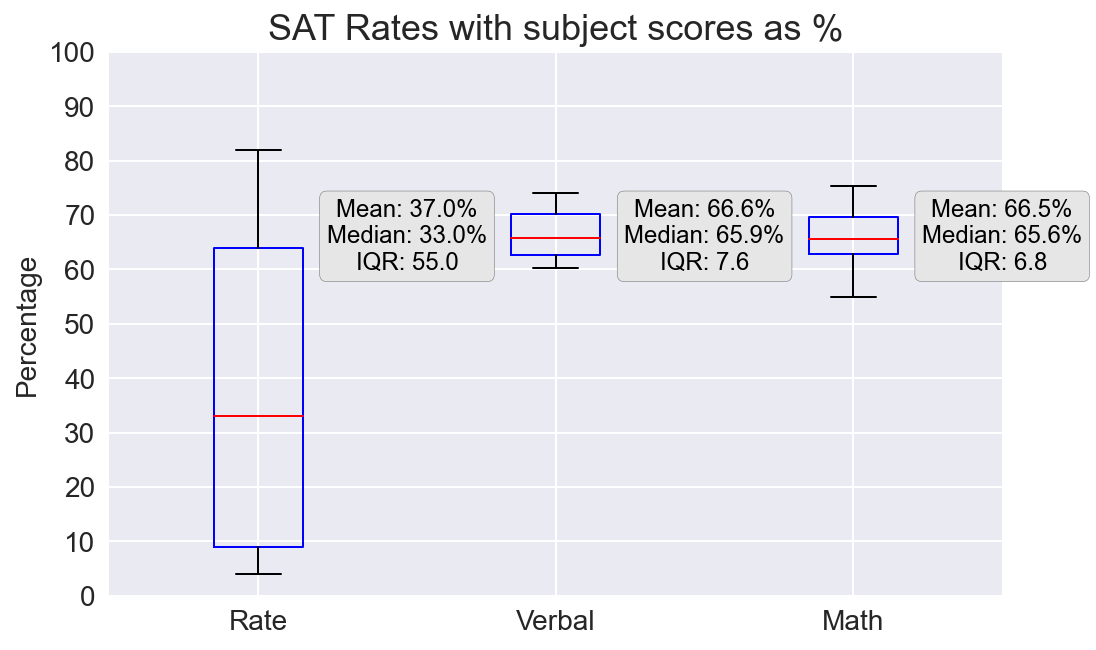

In [26]:
# Create boxplot with outcomes from Method 1

ax = df_sat_adjusted[[ 'Rate','Verbal','Math']].boxplot(figsize=(8,5), 
                                                   grid=True, 
                                                   fontsize=14, 
                                                   color= {"boxes": "Blue","whiskers": "Black","medians": "Red","caps": "Black"}
                                                  )
# adjust some plot parameters
ax.set_title('SAT Rates with subject scores as %', fontsize=18)
ax.yaxis.set_ticks(np.arange(0,110,10))
ax.set_ylabel('Percentage', fontsize=14);

# add annotations of some statistics to give the viewer clear outcomes
for i in range(3):
    text = 'Mean: ' + str(means[i]) + '%\n' + 'Median: ' + str(medians[i])+ '%\n' + 'IQR: ' + str(iqrs[i])
    ax.annotate(text,xy=(1.5+i,60), color='black', fontsize=12, bbox=dict(boxstyle='round', fc='0.9',ec='gray' ), ha='center')

plt.savefig('SAT_boxplot.png')

### Method 2:
- Use the standardisation methodolgy, based on z-scores

In [27]:
# Create copy of SAT DF and slice out the numerical data
df_sat_std = df_sat[['Rate', 'Verbal', "Math"]].copy()
df_sat_std.head()

,Rate,Verbal,Math
0,82,509,510
1,81,499,513
2,79,511,515
3,77,495,505
4,72,520,516


In [28]:
# Standardise the variables using formula technique
df_sat_std = (df_sat_std - df_sat_std.mean()) / df_sat_std.std()
df_sat_std.head()

,Rate,Verbal,Math
0,1.633353,-0.705304,-0.601948
1,1.597057,-1.005058,-0.519275
2,1.524463,-0.645353,-0.464159
3,1.451870,-1.124960,-0.739737
4,1.270386,-0.375574,-0.436602


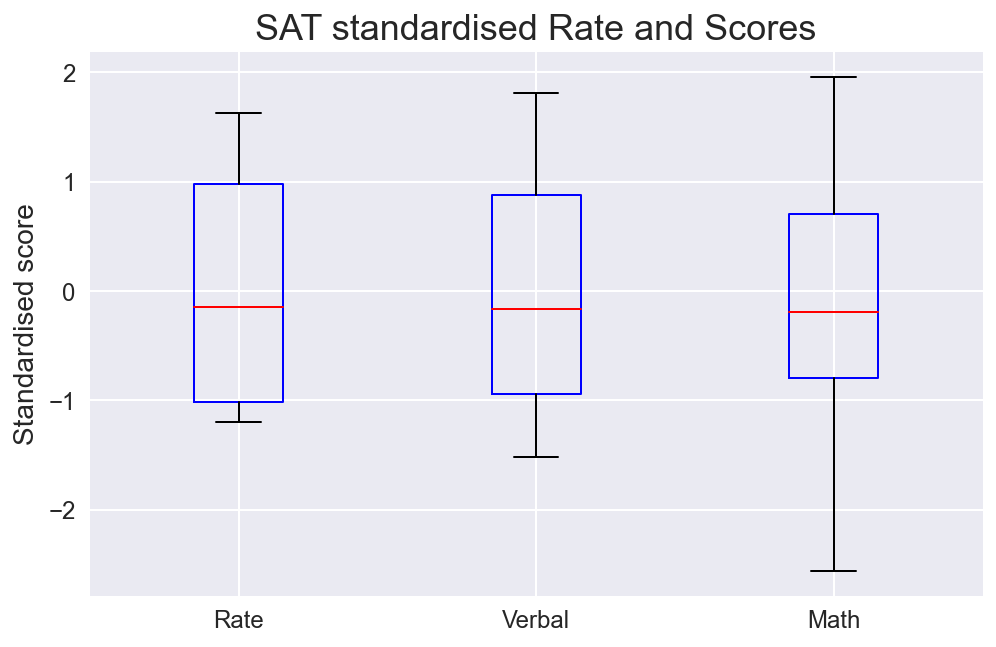

In [29]:
# plot the standardised data
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax = df_sat_std[['Rate','Verbal','Math']].boxplot(figsize=(8,5),
                                         grid=True,
                                         fontsize=12,
                                         color={"boxes": "Blue","whiskers": "black","medians": "Red","caps": "Black"}
                                         )

# adjust some plot parameters
ax.set_title('SAT standardised Rate and Scores', fontsize=18)
ax.set_ylabel('Standardised score', fontsize=14);

plt.show();

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [30]:
# Slice out the states that have Verbal scores higher than the mean avg and then create a list
verbal_higher_mean = df_sat.loc[df_sat['Verbal'] > np.mean(df_sat['Verbal'])]
states_verbal_higher_mean = [a for a in verbal_higher_mean['State']]

#print out the list 
print(states_verbal_higher_mean)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [31]:
#Count the number of States in the list
verbal_higher_mean['State'].count()

24

### Rus' Notes:
- There are **24 states** with Verbal SAT scores above the mean average.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [32]:
# Slice out the states that have Verbal scores higher than the median avg and then create a list
verbal_higher_med = df_sat.loc[df_sat['Verbal'] > np.median(df_sat['Verbal'])]
states_verbal_higher_med = [a for a in verbal_higher_med['State']]

#print out the list
print(states_verbal_higher_med)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [33]:
#Count the number of States in the list
verbal_higher_med['State'].count()

24

In [34]:
# Check whether the states with higher than mean and median Verbal scores are the same
states_verbal_higher_mean == states_verbal_higher_med   

True

### Rus' Notes:
- the two lists are identical, therefore the same states have Verbal scores above the mean and median averages

In [35]:
"""Secondary check on the comparison between the two subsets: 'higher than mean' and 'higher than median' """
"""Merged DF is of same length as individual DFs, therefore confirming that there is consistency between the States""" 
"""in these subsets"""

# Inner merge to check if two DFs are ID
pd.merge(verbal_higher_mean, verbal_higher_med, how='inner', on='State', suffixes=('__LEFT', '__RIGHT'))

,State,Rate__LEFT,Verbal__LEFT,Math__LEFT,Rate__RIGHT,Verbal__RIGHT,Math__RIGHT
0,CO,31,539,542,31,539,542
1,OH,26,534,439,26,534,439
2,MT,23,539,539,23,539,539
3,ID,17,543,542,17,543,542
4,TN,13,562,553,13,562,553
5,NM,13,551,542,13,551,542
6,IL,12,576,589,12,576,589
7,KY,12,550,550,12,550,550
8,WY,11,547,545,11,547,545
9,MI,11,561,572,11,561,572


In [36]:
# Check the mean and median values 
[round(np.mean(df_sat['Verbal']),1), np.median(df_sat['Verbal'])]

[532.5, 527.0]

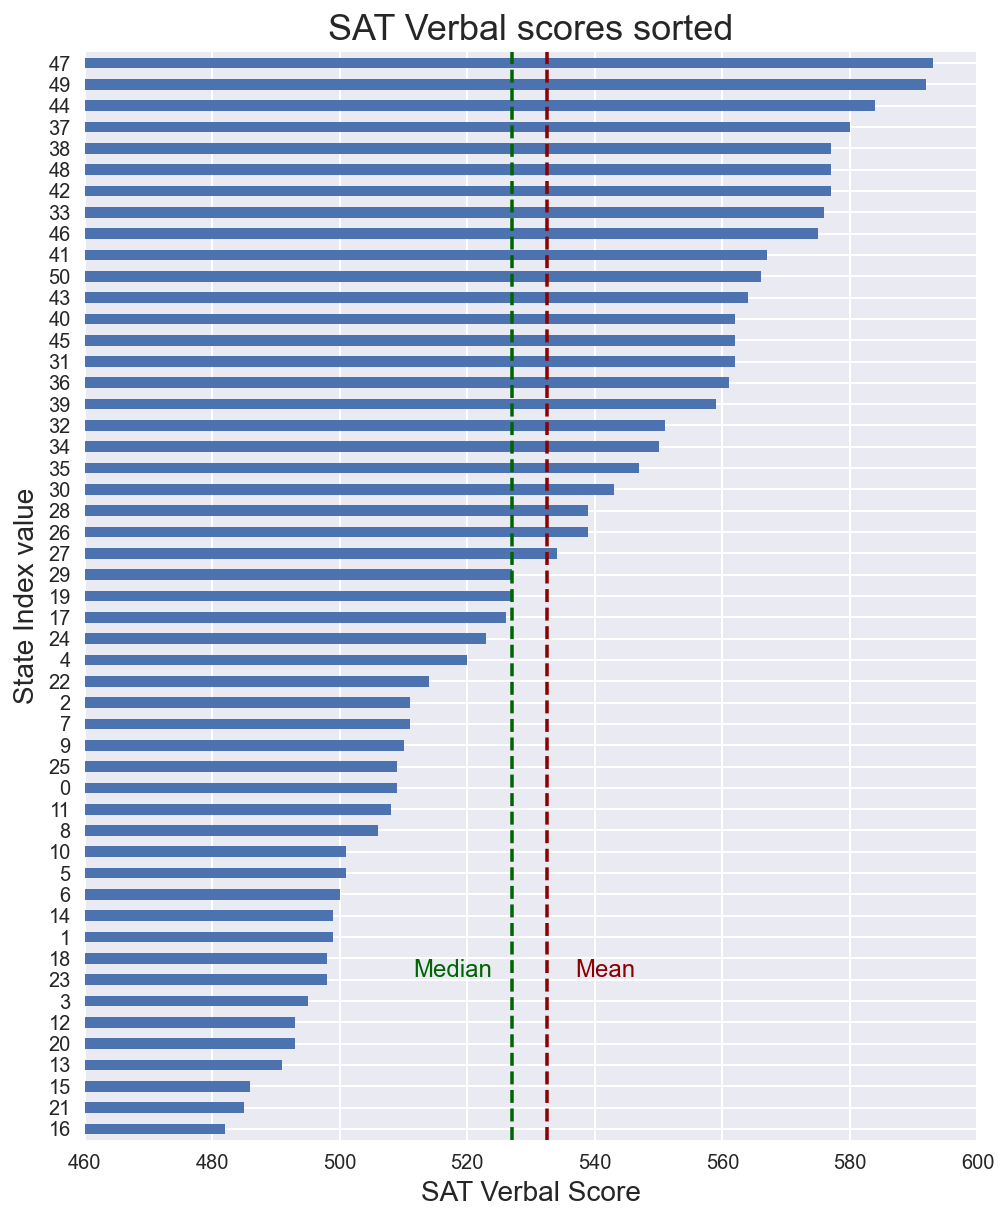

In [37]:
# Visually interogate the dist of the Verbal SAT scores based on State and ordered.
# Included the Mean/Median values to explore why the two lists are identical

ax_02 = df_sat['Verbal'].sort_values(ascending=True).plot(kind='barh',figsize=(8,10));

# set the title
ax_02.set_title('SAT Verbal scores sorted', fontsize=18)

# x-axis
ax_02.set_xlabel('SAT Verbal Score',fontsize=14)
ax_02.set_xlim(460,600)
# y-axis labels
ax_02.set_ylabel('State Index value',fontsize=14);

ax_02.axvline(x=np.mean(df_sat['Verbal']), c='Darkred', ls='--')
ax_02.axvline(x=np.median(df_sat['Verbal']), c='Darkgreen', ls='--')

ax_02.annotate(text='Mean',xy=(0.57,0.2), xycoords='figure fraction', color='Darkred', fontsize=12)
ax_02.annotate(text='Median',xy=(0.41,0.2), xycoords='figure fraction', color='Darkgreen', fontsize=12);

In [38]:
# Isolate the SAT data for State WV (Index 29)
df_sat.iloc[29:30,:]

,State,Rate,Verbal,Math
29,WV,18,527,512


### Rus' Notes:
- Slicing the SAT data for States above the mean and median average Verbal scores results in the same subset for this data.
- The US mean average and median average Verbal test scores are **532.5** and **527.0** respectively. A difference of only **5.5** points
- Looking at the US wide Verbal scores (see `SAT Verbal scores sorted` plot above), there is a step change in state scores about the score location of the two averages.
- Looking more closely at the median line, the Verbal score for West Virginia (index 29) is equal to the US median score. If the logic condition were re-considered as "greater or equal to", an extra state would occur in the dataframe slice by the median score.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [39]:
# Add new column with the delta 
df_sat['Delta_VM'] = df_sat['Verbal'] - df_sat['Math']

In [40]:
df_sat.head()

,State,Rate,Verbal,Math,Delta_VM
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [41]:
# Top 10 States by greatest Verbal score delta compared to Maths
sat_greater_verbal = df_sat.sort_values(by='Delta_VM', ascending=False, ignore_index=True)
sat_greater_verbal = sat_greater_verbal.iloc[0:10]

# show the top 3 rows
sat_greater_verbal.head(3)

,State,Rate,Verbal,Math,Delta_VM
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15


In [42]:
# Top 10 States by greatest Maths score delta compared to Verbal
sat_greater_maths = df_sat.sort_values(by='Delta_VM', ascending=True, ignore_index=True)
sat_greater_maths = sat_greater_maths.iloc[0:10]

# show the top 3 rows
sat_greater_maths.head(3)

,State,Rate,Verbal,Math,Delta_VM
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


### Rus' Notes:
- A correlation matrix outputs the correlation values between each of the variables matched across the matrix.
- The correlation values provide a standardised value between ±1 indicating the strength and direction of the linear relationship between the two corresponding variables.
- Pandas provides a handy method to output the correlation matrix as a DF. This can also be plotted as a heatmap to create a visual plot of the correlation values. 

In [43]:
# correlation matrix of the SAT data
sat_mat = df_sat[['Rate','Verbal','Math']].corr()
sat_mat

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


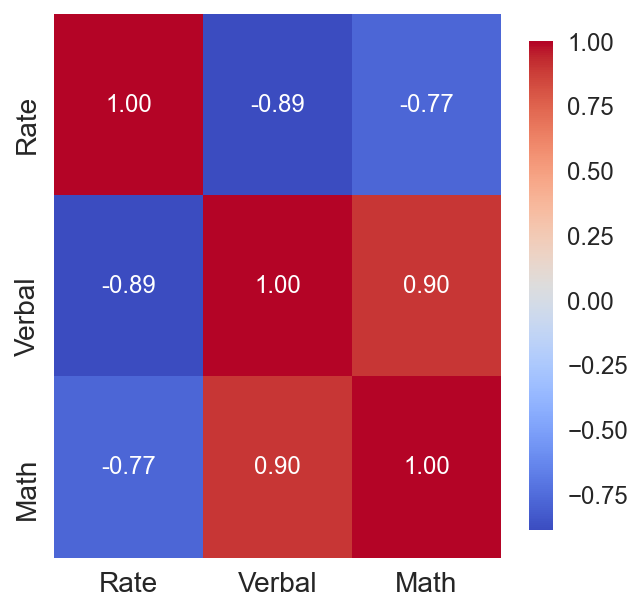

In [44]:
# SAT correlation matrix plotted as a heatmap

fig = plt.figure(figsize=(5,5))
ax = fig.gca()

res = sns.heatmap(sat_mat, 
            cmap= sns.color_palette("coolwarm", as_cmap=True),
            fmt=".2f", 
            annot=True, 
            cbar_kws={"shrink": .9},
            annot_kws={"fontsize":12}
            )
#modify the axis labels
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)

# modify the cbar text
cbar = res.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.savefig('SAT_corr.png')
plt.show();

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [45]:
df_sat.describe()

,Rate,Verbal,Math,Delta_VM
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


### Rus' Notes:
- The output shows the following statistics for each data series in the DataFrame;
    - `count` = a count of the data points
    - `mean` = the mean average
    - `std` = the standard deviation 
    - `min` = the minimum value
    - `25%` = the 25th percentile value
    - `50%` = the 50th percentile value
    - `75%` = the 75th percentile value
    - `max` = the maximum value

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [46]:
# correlation matrix of the SAT data
sat_mat_cov = df_sat[['Rate','Verbal','Math']].cov()
sat_mat_cov

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


### Rus' Notes:
1. The covariance matrix shows the statistical covariance between the variables. The covariance provides an indication of the direction of the linear relationship betweem the variables.
2. Covariance can be converted to correlation values by dividing by the product of the variable standard deviations.
3. Correlation values are preferred as they provide a measure of both the strength and direction of the linear relationship, and are easier understand as the values are standardised between ±1.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [47]:
# Load in CSV data using the mighty Pandas.
drugs_data = pd.read_csv('drug-use-by-age.csv')
drugs_data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [48]:
drugs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 



### Rus' Notes:
- the DF info clearly shows that there are a number of Series classified as `object` which suggests these series might contain spurious data values.
- The data set will need to be cleaned prior to analysis.



In [49]:
# make list of current col names
col_names = [col for col in drugs_data.columns]

# create a sub-list of columns that contain 'Object' data types 
object_cols = [a for a in col_names if drugs_data[a].dtypes == 'O']

# print out the list and visiually check it matches the info output
print(object_cols)

['age', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']


In [50]:
#slice out DF showing only columns with 'object' data types for closer inspection
drugs_data.loc[:,[a for a in col_names if drugs_data[a].dtypes == 'O']]

,age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,5.0,-,35.5,19.0,24.5,-
1,13,1.0,3.0,-,12.0,41.0,5.0
2,14,5.5,-,2.0,5.0,4.5,24.0
3,15,4.0,9.5,1.0,5.5,3.0,10.5
4,16,7.0,1.0,66.5,3.0,4.0,36.0
5,17,5.0,21.0,64.0,4.0,6.0,48.0
6,18,5.0,10.0,46.0,4.0,7.0,12.0
7,19,5.5,2.0,180.0,3.0,7.5,105.0
8,20,8.0,5.0,45.0,4.0,12.0,12.0
9,21,5.0,17.0,30.0,2.0,13.5,2.0





#### Rus' Notes:
- the sliced DF clearly shows that there are dashes in place of actual data in some cells for all the series marked for cleaning.
- There is no clear indication of what the data should be.
- complete removal of the spurious data rows would deminish the data set.
- Spurious data will be replaced with `NaN` values.





In [51]:
# copy dataframe prior to cleaning 
drugs_cleaned = drugs_data.copy()

In [52]:
# modify all 'dash' entries as NaN in all non-'age' columns
drugs_cleaned = drugs_cleaned.loc[:,'n':].applymap(lambda i: np.nan if i == '-' else i)

In [53]:
# classify all numeric columns to float type integers, e.g. remove 'object' types, skip the 'age' column to maintain the str
for x, y in enumerate(object_cols):
    if y != 'age':
        drugs_cleaned[y] = drugs_cleaned[y].astype('float')

In [54]:
# re-insert the 'age' data column and then re-order in accordance with original DF
drugs_cleaned['age'] = drugs_data['age']
drugs_cleaned = drugs_cleaned.reindex(columns=col_names)
drugs_cleaned.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [55]:
# Copy cleaned DF to new variable
drugs = drugs_cleaned.copy()

In [56]:
drugs.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.000,2798.00,3058.000,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.100,64.60,77.500,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.000,48.00,52.000,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.700,20.80,28.400,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.000,52.00,52.000,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.500,2.00,4.000,4.9
cocaine-frequency,16.0,7.875000,8.038449,1.0,5.000,5.25,7.250,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.000,0.40,0.500,0.6
crack-frequency,14.0,15.035714,18.111263,1.0,5.000,7.75,16.500,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.100,0.20,0.600,1.1


### Rus' Notes: Visualisation of data

- Visualisation of the data is an efficient way to view and check the data, allowing quick observation of trends and any potential anomolous data



In [57]:
# create list of the columns names for all usage values
drugs_use_cols = [x for x in drugs.columns.values if 'use' in x]


In [58]:
# create list of the columns names for all frequency values
drugs_freq_cols = [x for x in drugs.columns.values if 'freq' in x]
#print(drugs_freq_cols)

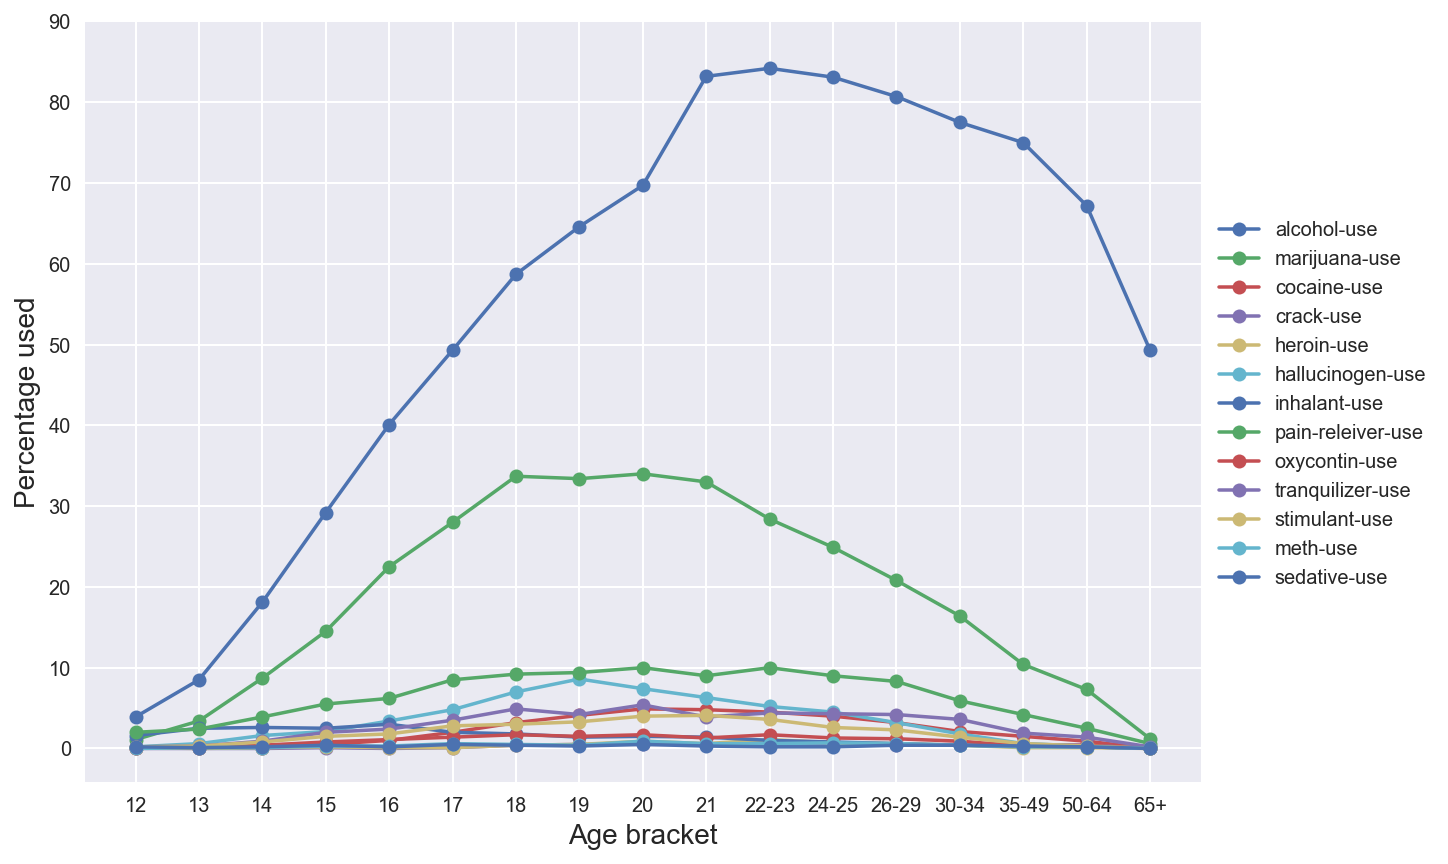

In [59]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()

for i, j in enumerate(drugs_use_cols):
    drugs[['age',j]].plot(kind='line', x='age', ax=ax, style='o-', x_compat=True, legend=0)

# y-axis labels
ax.set_ylabel('Percentage used',fontsize=14); 
ax.set_xlabel('Age bracket',fontsize=14); 

#Force the x-labels
x_max = int(max(plt.xticks()[0]))
plt.xticks(range(0, x_max-1), drugs.age.values) 

plt.yticks(range(0,100,10))

fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))

plt.show();


#### Notes:
- the above plot is a simple way to show all drug usage values, however with the various data series it is hard to ascertain any particular insights.
- This could be resolved by standardising the data so that it could be shown on a similar scale. However, the large number of data series would still be visually "busy" on a single plot



In [60]:
# Slice out and create a drug usage DF
drugs_usage = drugs[drugs_use_cols]

# reindex the drug_usage DF with the Age values
drugs_usage.index = drugs['age'].values

#drugs_usage.head()

In [61]:
# Slice out and create a drug frequency DF
drugs_freq = drugs[drugs_freq_cols]

# reindex the drug_usage DF with the Age values
drugs_freq.index = drugs['age'].values

#drugs_freq.head(2)

#### Notes:

- Individual drugs covered in the study have been plotted on individual plots with side-by-side plots of the usage and frequency of each.
- bar charts have been utilised to show the data per age bracket.


- **Insights:**
    - Alcohol usage is relatively high (+40%) above the age of 16, with relatively high frequency rates (+50%) above the minimum legal age (21)
    - Marijuana usgae seems to peak in the late teens and early 20's, however frequency rates of users remains fairly high (30-50%) throughout adulthood.
    - Usage of harder the Class-A drugs Cocaine, Crack and Heroin are relatively low in the sample (<5%, <0.6% and <1.1% respectively). However, there are substantial frequency spikes in the age ranges 35-49 and 50-64, suggesting that there is a subset of **heavy** users within the population. Heavy users in these groups are on average using at least fortnightly, and potentially every few days with Heroin.
    - There are similar heavy user spikes in Meth usage with five age groups indicating an average usage on a weekly basis.
    - There are some data points which are odd and could indicate erroneous data. In particular, frequency of Hallucinogenics usage in age groups '12' and '65+' indicate that there are outlier heavy users of this drug. It doesn't seem sensible that 12yr olds would be using on an average weekly basis.

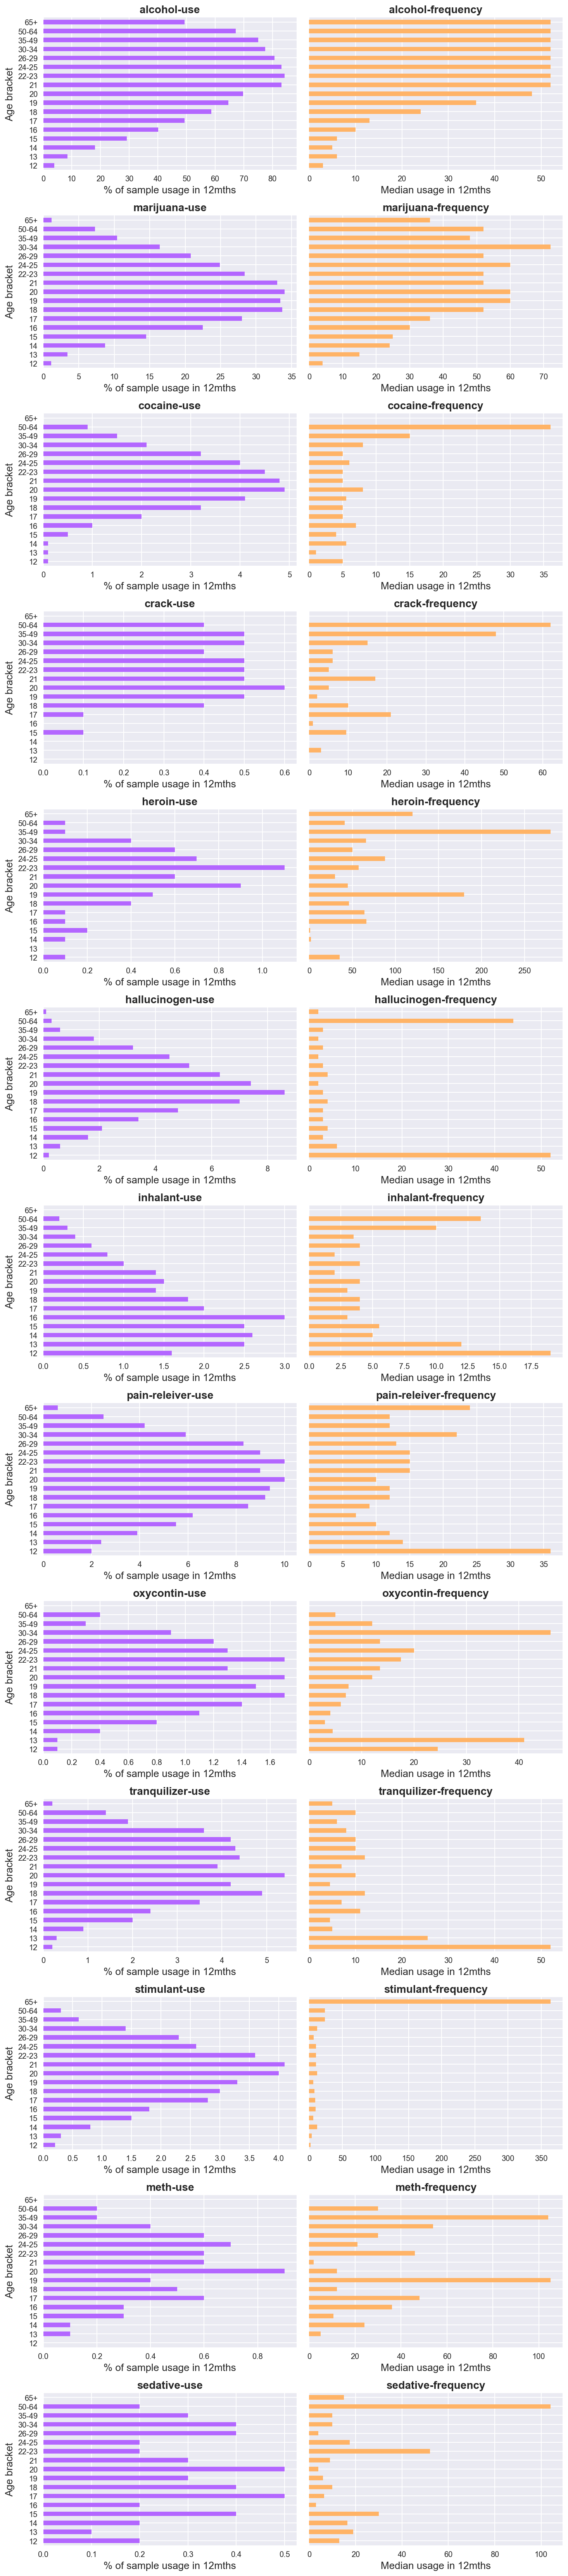

In [62]:
# Plot out all Drug type usage against the Age brackets to view the variation across all t

# assign fig and axis vars for subplot
fig, axs = plt.subplots(13, 2, figsize=(12,60))

# Loop through DFs and plot out the usage coincident with freq for each type
for x, y in enumerate(drugs_use_cols):
    
    # Drug usage plot and axis settings
    drugs_usage[y].plot(kind='barh', ax=axs[x,0], color = '#b366ff')
    axs[x,0].set_title(y,fontsize=14, fontweight='bold')
    axs[x,0].set_ylabel('Age bracket',fontsize=13)
    axs[x,0].set_xlabel('% of sample usage in 12mths',fontsize=13)
    
    #Drug frequency plot and axis settings
    drugs_freq[drugs_freq_cols[x]].plot(kind='barh', ax=axs[x,1], color = '#ffb366', sharey=True)
    axs[x,1].set_title(drugs_freq_cols[x],fontsize=14, fontweight='bold')
    axs[x,1].set_xlabel('Median usage in 12mths',fontsize=13)

plt.subplots_adjust(hspace=0.3, wspace=0.05)     #modify the spacing between the plot axes 

plt.show()

### Rus' Notes: Lets standardise the drug usage

- Drug usage has been standardised to review and investigate how the drug usage varies around the means. (and to practice the technique)
- The plot series to clearly show where the above/below average drug usage occurs across the age groups for each drug type.

In [63]:
# standardise the drug usage values
drugs_usage_std = (drugs_usage - drugs_usage.mean()) / drugs_usage.std()

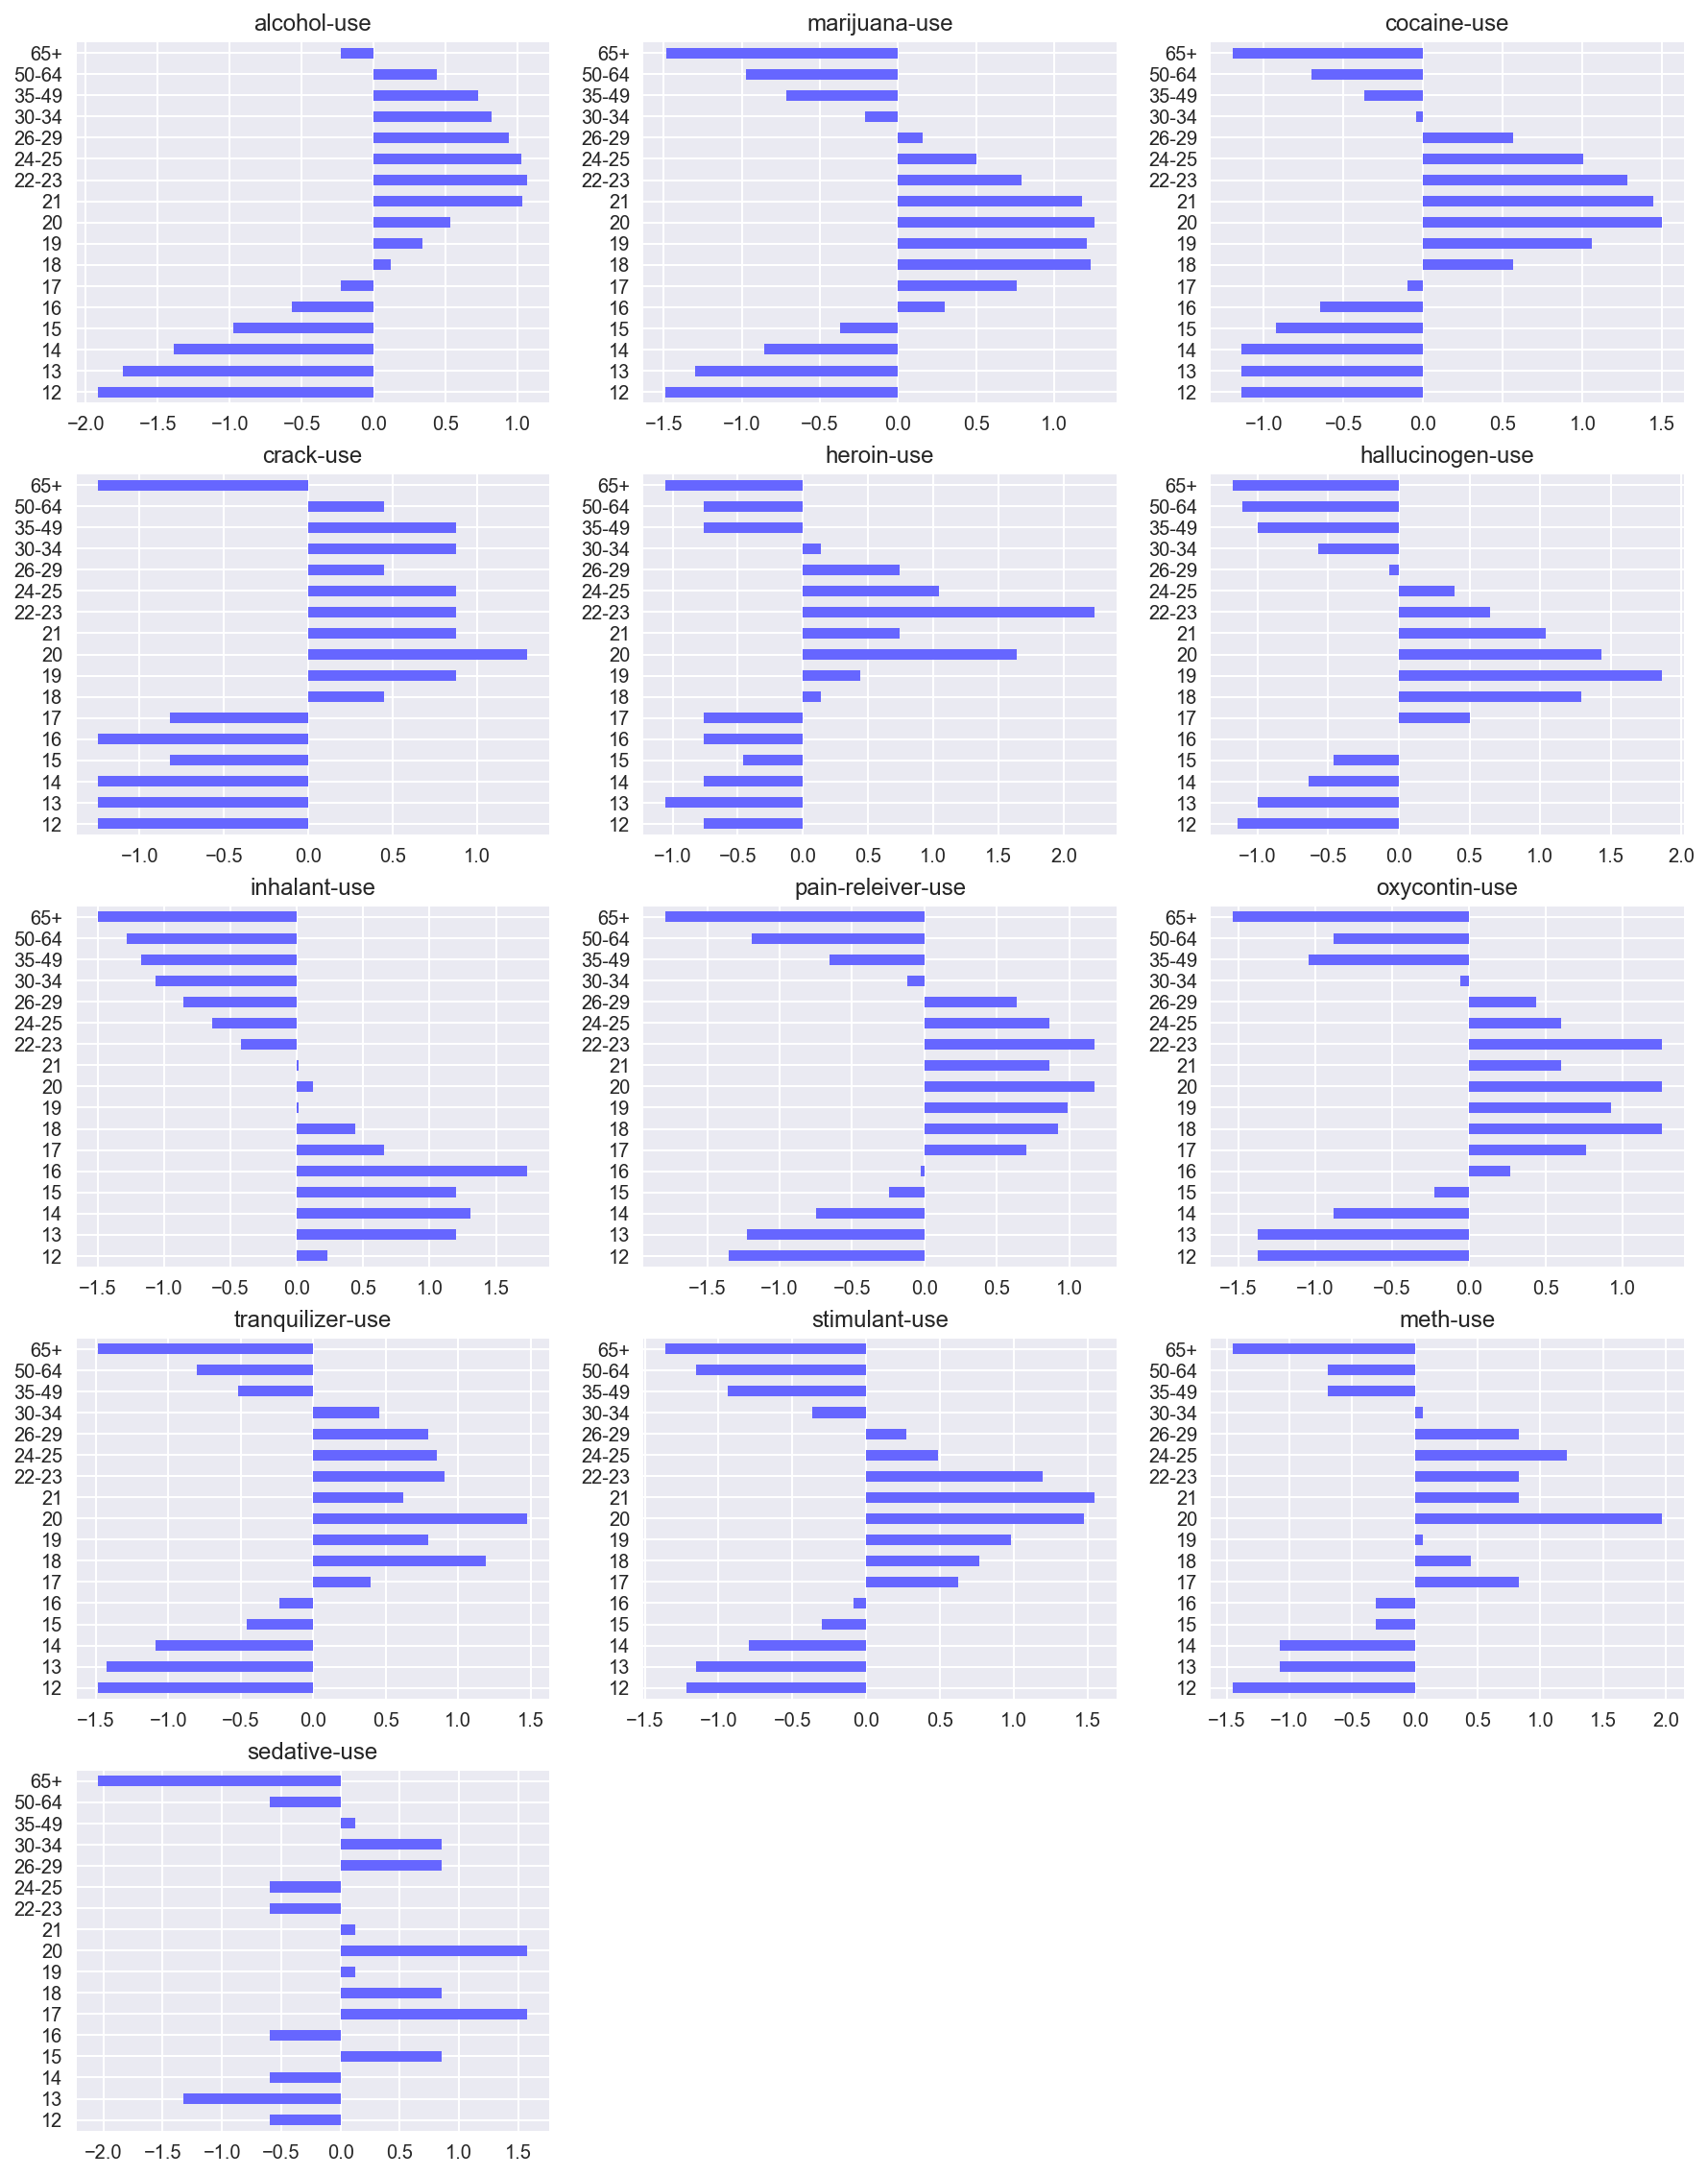

In [64]:
# Plot out all STANDARDISED Drug type usage against the Age brackets to view the variation across all drugs and 
# understand the movement around the mean

# set up some grid parameters to lay out the plotting
grid1 = 3                                            # set grid width
grid2 = int(np.ceil(len(drugs_use_cols) / grid1 ))   # auto calc how many rows needed based on selected grid width

# set-up subplot vars
fig, axs = plt.subplots(grid2, grid1, figsize=(15,20))

# init loop control
count = 0
counter = 0

# Loop through each axis and plot different drug use data
for x, y in enumerate(drugs_use_cols):
    if counter == grid1:
        counter = 0
        count +=1
    
    drugs_usage_std[y].plot(kind='barh', ax=axs[count,counter], color = '#6666ff') 
    axs[count,counter].set_title(y)                  # modify axis title
    counter += 1

#delete empty axes (note this is 'dumb' and needs to be manually set
fig.delaxes(axs[4,1])  
fig.delaxes(axs[4,2])    
    
plt.show()

### Rus' Notes:  Review drug usage by age bracket

- Drug use by age bracket has been interogated to investigate whether drugs are favoured differently across the age brackets.


- The bar charts below clearly identify that 'Alcohol' is the drug of choice across all ages, with 'Marijuana' generally second.
- This has been quantitavely verified by ranking the data set for each age (see below).
    - for all ages from 14-65+ the top 3 drugs of choice in order are; Alcohol, Marijuana and Pain-releiver.
    - there is some difference in the 2nd/3rd ranked drugs for 12 and 13 yr olds


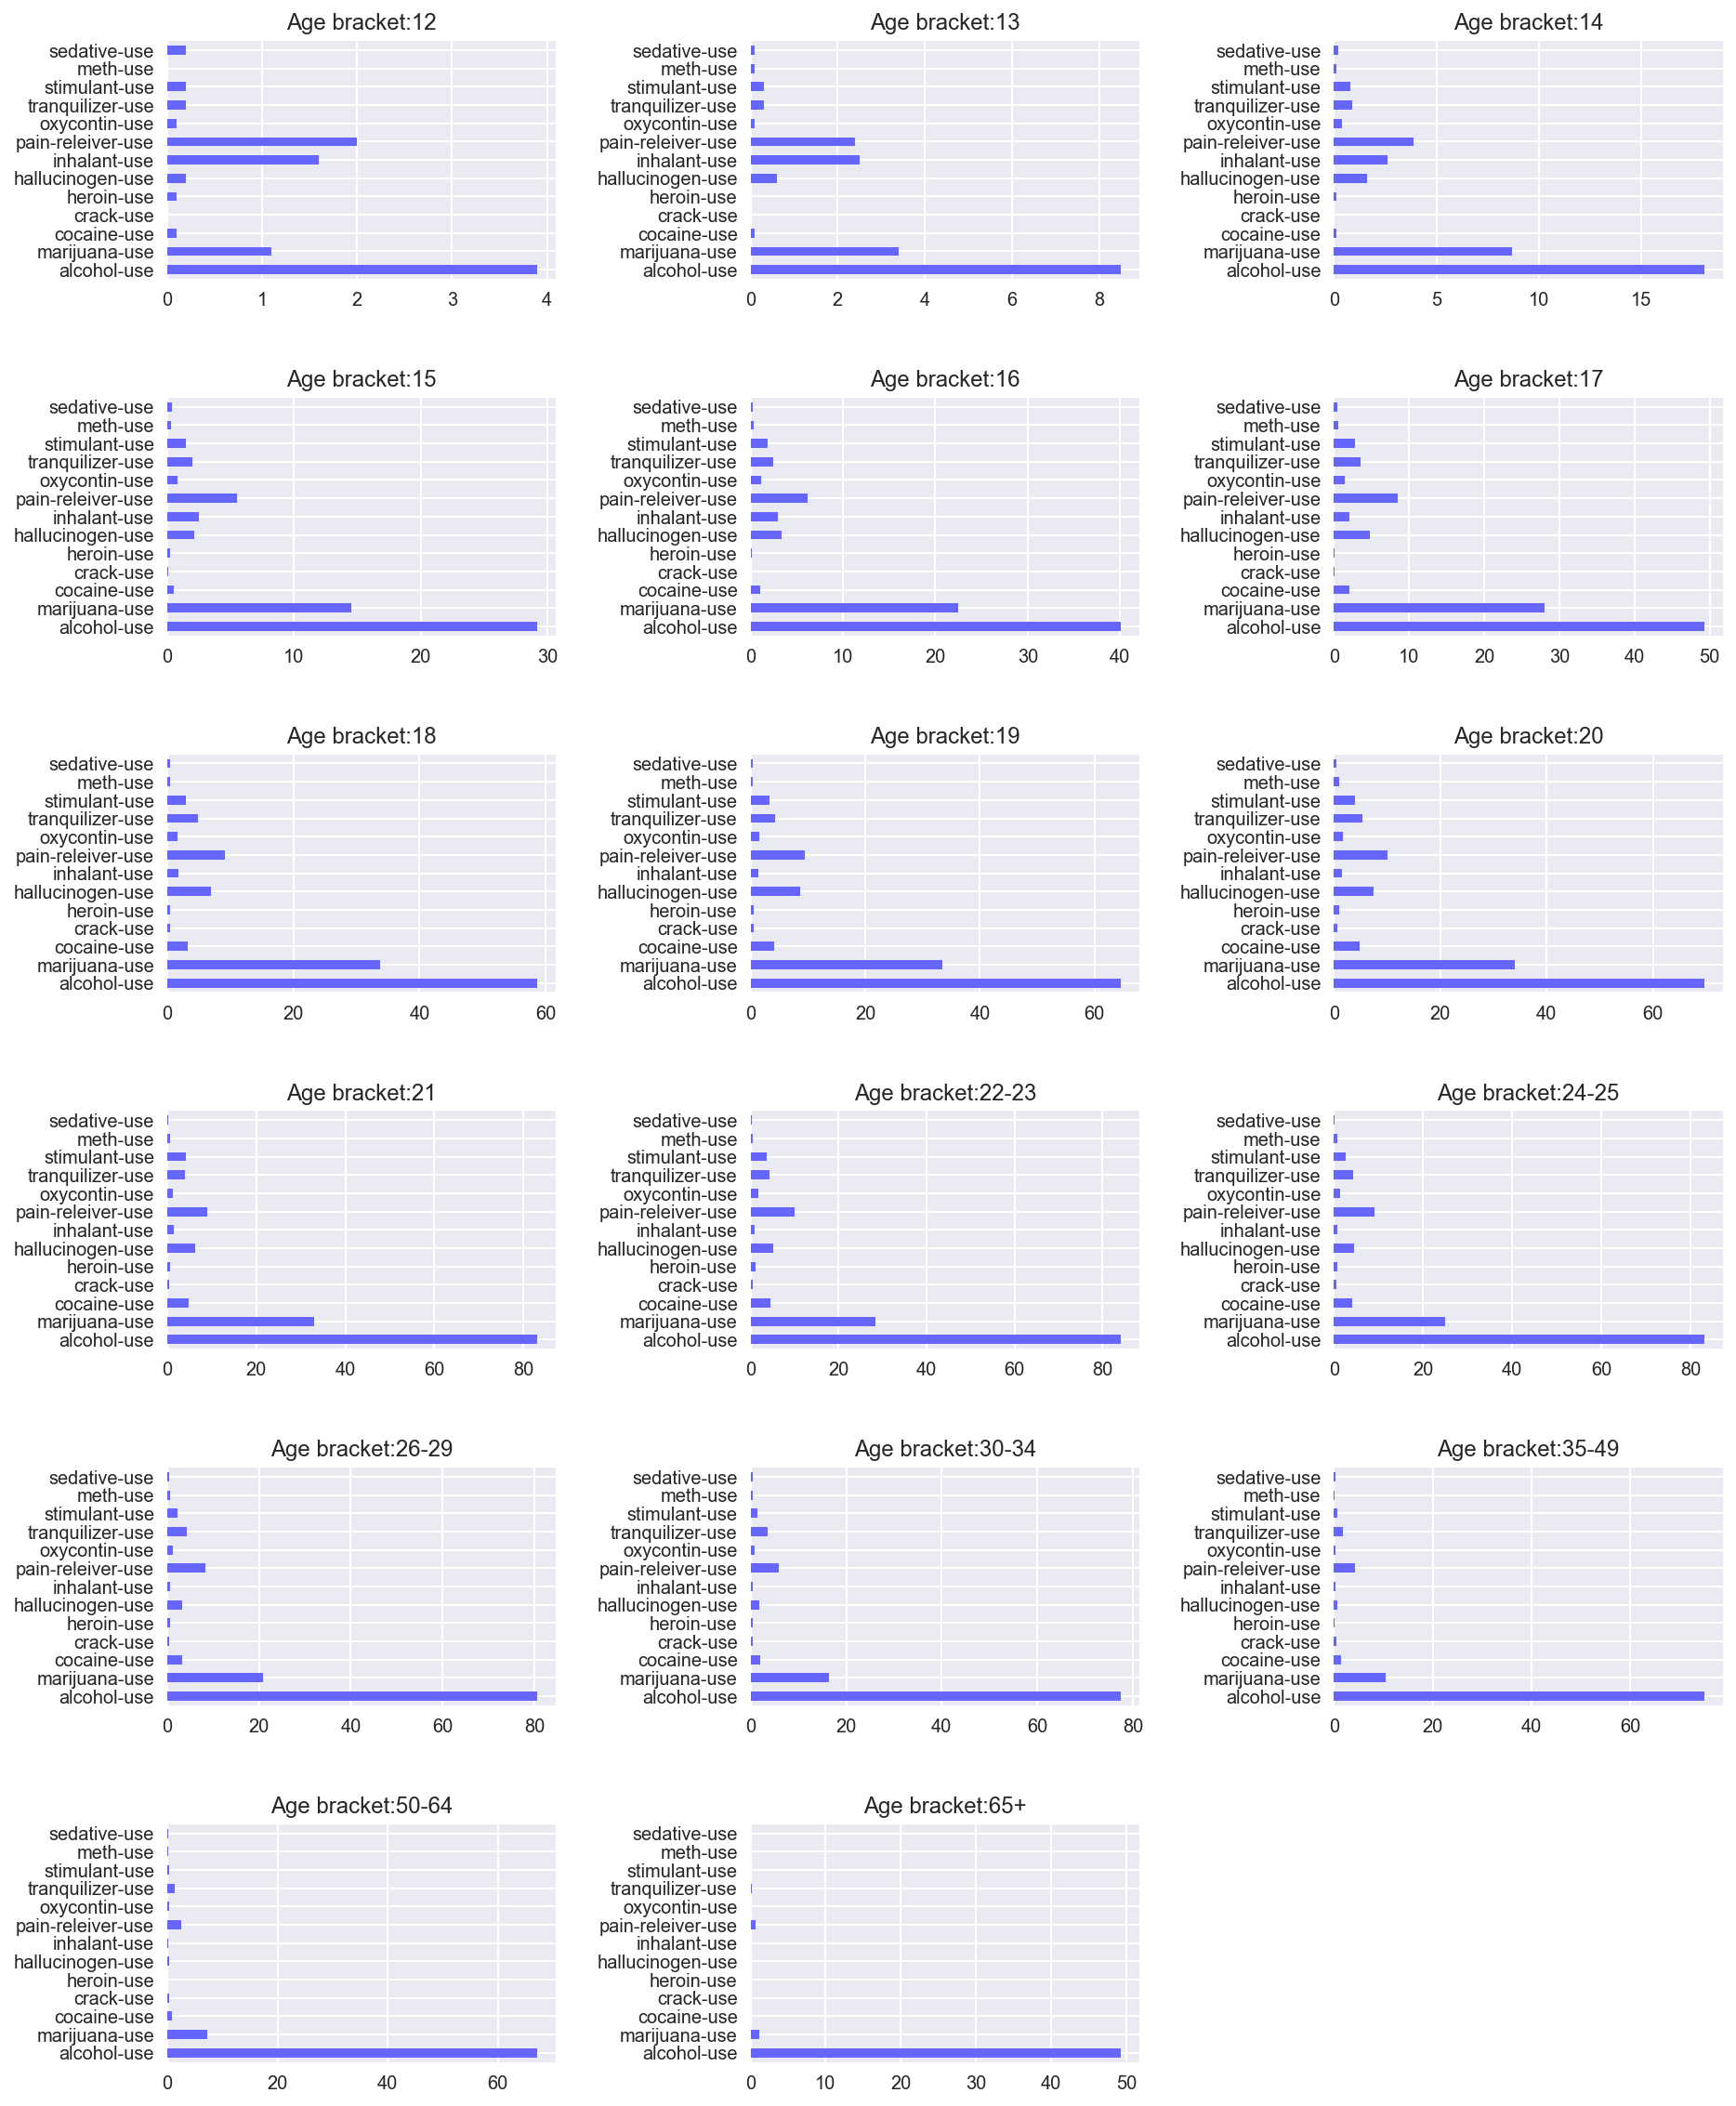

In [65]:
# Plot out all STANDARDISED Drug type usage against the Age brackets to view the variation across all drugs and 
# understand the movement around the mean

# Set grid col count to 3 and auto calc the number of rows as needed
grid1 = 3
grid2 = int(np.ceil(len(drugs.age.values) / grid1 ))

# set up subplot vars
fig, axs = plt.subplots(grid2, grid1, figsize=(15,20))

# init indexing vars
count = 0
counter = 0

# Loop through all axes and plot out the drugs usage by individual age group
for x, y in enumerate(drugs.age.values):
    if counter == grid1:
        counter = 0
        count +=1
    
    # Transpose the DF and plot the age group series on each axis
    drugs_usage.T[y].plot(kind='barh', ax=axs[count,counter], color = '#6666ff') 
    axs[count,counter].set_title('Age bracket:' + y)
    counter += 1

plt.subplots_adjust(wspace=0.5, hspace=0.5)     #modify the spacing between the plot    
    
#delete empty axes
fig.delaxes(axs[5,2])    
    
plt.show()

In [66]:
# determine the top 3 drugs by usage for each age category and input into a dict var
# dict structure {'age group' : {1st: drug-A, 2nd: drug-B, 3rd: drug-C}}

podium = {}      # init dict

#Loop through each age group in the transposed DF, sort by highest vals, grab top 3 and add to podium dict var
for i, j in enumerate(drugs.age.values):
    tmp = drugs_usage.T[j].sort_values(ascending=False)
    top_3 = {'1st': (tmp.index[0], tmp[0]),'2nd': (tmp.index[1], tmp[1]), '3rd': (tmp.index[2], tmp[2])}
    podium[j] = top_3

# Print out the dict for review
for x, y in enumerate(drugs.age.values):
    print(y, podium[y])

12 {'1st': ('alcohol-use', 3.9), '2nd': ('pain-releiver-use', 2.0), '3rd': ('inhalant-use', 1.6)}
13 {'1st': ('alcohol-use', 8.5), '2nd': ('marijuana-use', 3.4), '3rd': ('inhalant-use', 2.5)}
14 {'1st': ('alcohol-use', 18.1), '2nd': ('marijuana-use', 8.7), '3rd': ('pain-releiver-use', 3.9)}
15 {'1st': ('alcohol-use', 29.2), '2nd': ('marijuana-use', 14.5), '3rd': ('pain-releiver-use', 5.5)}
16 {'1st': ('alcohol-use', 40.1), '2nd': ('marijuana-use', 22.5), '3rd': ('pain-releiver-use', 6.2)}
17 {'1st': ('alcohol-use', 49.3), '2nd': ('marijuana-use', 28.0), '3rd': ('pain-releiver-use', 8.5)}
18 {'1st': ('alcohol-use', 58.7), '2nd': ('marijuana-use', 33.7), '3rd': ('pain-releiver-use', 9.2)}
19 {'1st': ('alcohol-use', 64.6), '2nd': ('marijuana-use', 33.4), '3rd': ('pain-releiver-use', 9.4)}
20 {'1st': ('alcohol-use', 69.7), '2nd': ('marijuana-use', 34.0), '3rd': ('pain-releiver-use', 10.0)}
21 {'1st': ('alcohol-use', 83.2), '2nd': ('marijuana-use', 33.0), '3rd': ('pain-releiver-use', 9.0)}


In [67]:
## Check on next 3 positions to see what comes up
podium = {}      # init dict

#Loop through each age group in the transposed DF, sort by highest vals, grab top 3 and add to podium dict var
for i, j in enumerate(drugs.age.values):
    tmp = drugs_usage.T[j].sort_values(ascending=False)
    top_3 = {'4th': (tmp.index[3], tmp[3]),'5th': (tmp.index[4], tmp[4]), '6th': (tmp.index[5], tmp[5])}
    podium[j] = top_3

# Print out the dict for review
for x, y in enumerate(drugs.age.values):
    print(y, podium[y])

12 {'4th': ('marijuana-use', 1.1), '5th': ('hallucinogen-use', 0.2), '6th': ('tranquilizer-use', 0.2)}
13 {'4th': ('pain-releiver-use', 2.4), '5th': ('hallucinogen-use', 0.6), '6th': ('tranquilizer-use', 0.3)}
14 {'4th': ('inhalant-use', 2.6), '5th': ('hallucinogen-use', 1.6), '6th': ('tranquilizer-use', 0.9)}
15 {'4th': ('inhalant-use', 2.5), '5th': ('hallucinogen-use', 2.1), '6th': ('tranquilizer-use', 2.0)}
16 {'4th': ('hallucinogen-use', 3.4), '5th': ('inhalant-use', 3.0), '6th': ('tranquilizer-use', 2.4)}
17 {'4th': ('hallucinogen-use', 4.8), '5th': ('tranquilizer-use', 3.5), '6th': ('stimulant-use', 2.8)}
18 {'4th': ('hallucinogen-use', 7.0), '5th': ('tranquilizer-use', 4.9), '6th': ('cocaine-use', 3.2)}
19 {'4th': ('hallucinogen-use', 8.6), '5th': ('tranquilizer-use', 4.2), '6th': ('cocaine-use', 4.1)}
20 {'4th': ('hallucinogen-use', 7.4), '5th': ('tranquilizer-use', 5.4), '6th': ('cocaine-use', 4.9)}
21 {'4th': ('hallucinogen-use', 6.3), '5th': ('cocaine-use', 4.8), '6th': ('st

### Rus' Notes: Lets look at some relationships
- A look at the correlations between the variables is a good method to get further insights into the data.
- A pairplot was considered, howvere given the large number of variables and hence relationships, a pairplot is difficult to get a nuanced view of the correlations.
- Alternatively, the correlation coefficient matrix has been plotted as heatmap, adjusted to only show the relationships once (achieved utilising a masking method).


- **Insights:**
    - there are strong positive correlations between most drugs.
    - exceptions being 'Inhalent' and 'Sedative' which don't have particularly string correlations with any other drug.
    - Highest correlation exists between 'Oxycontin' and 'Pain relievers', which makes sense given that Oxycontin is prescribed as a pain relief drug.
    

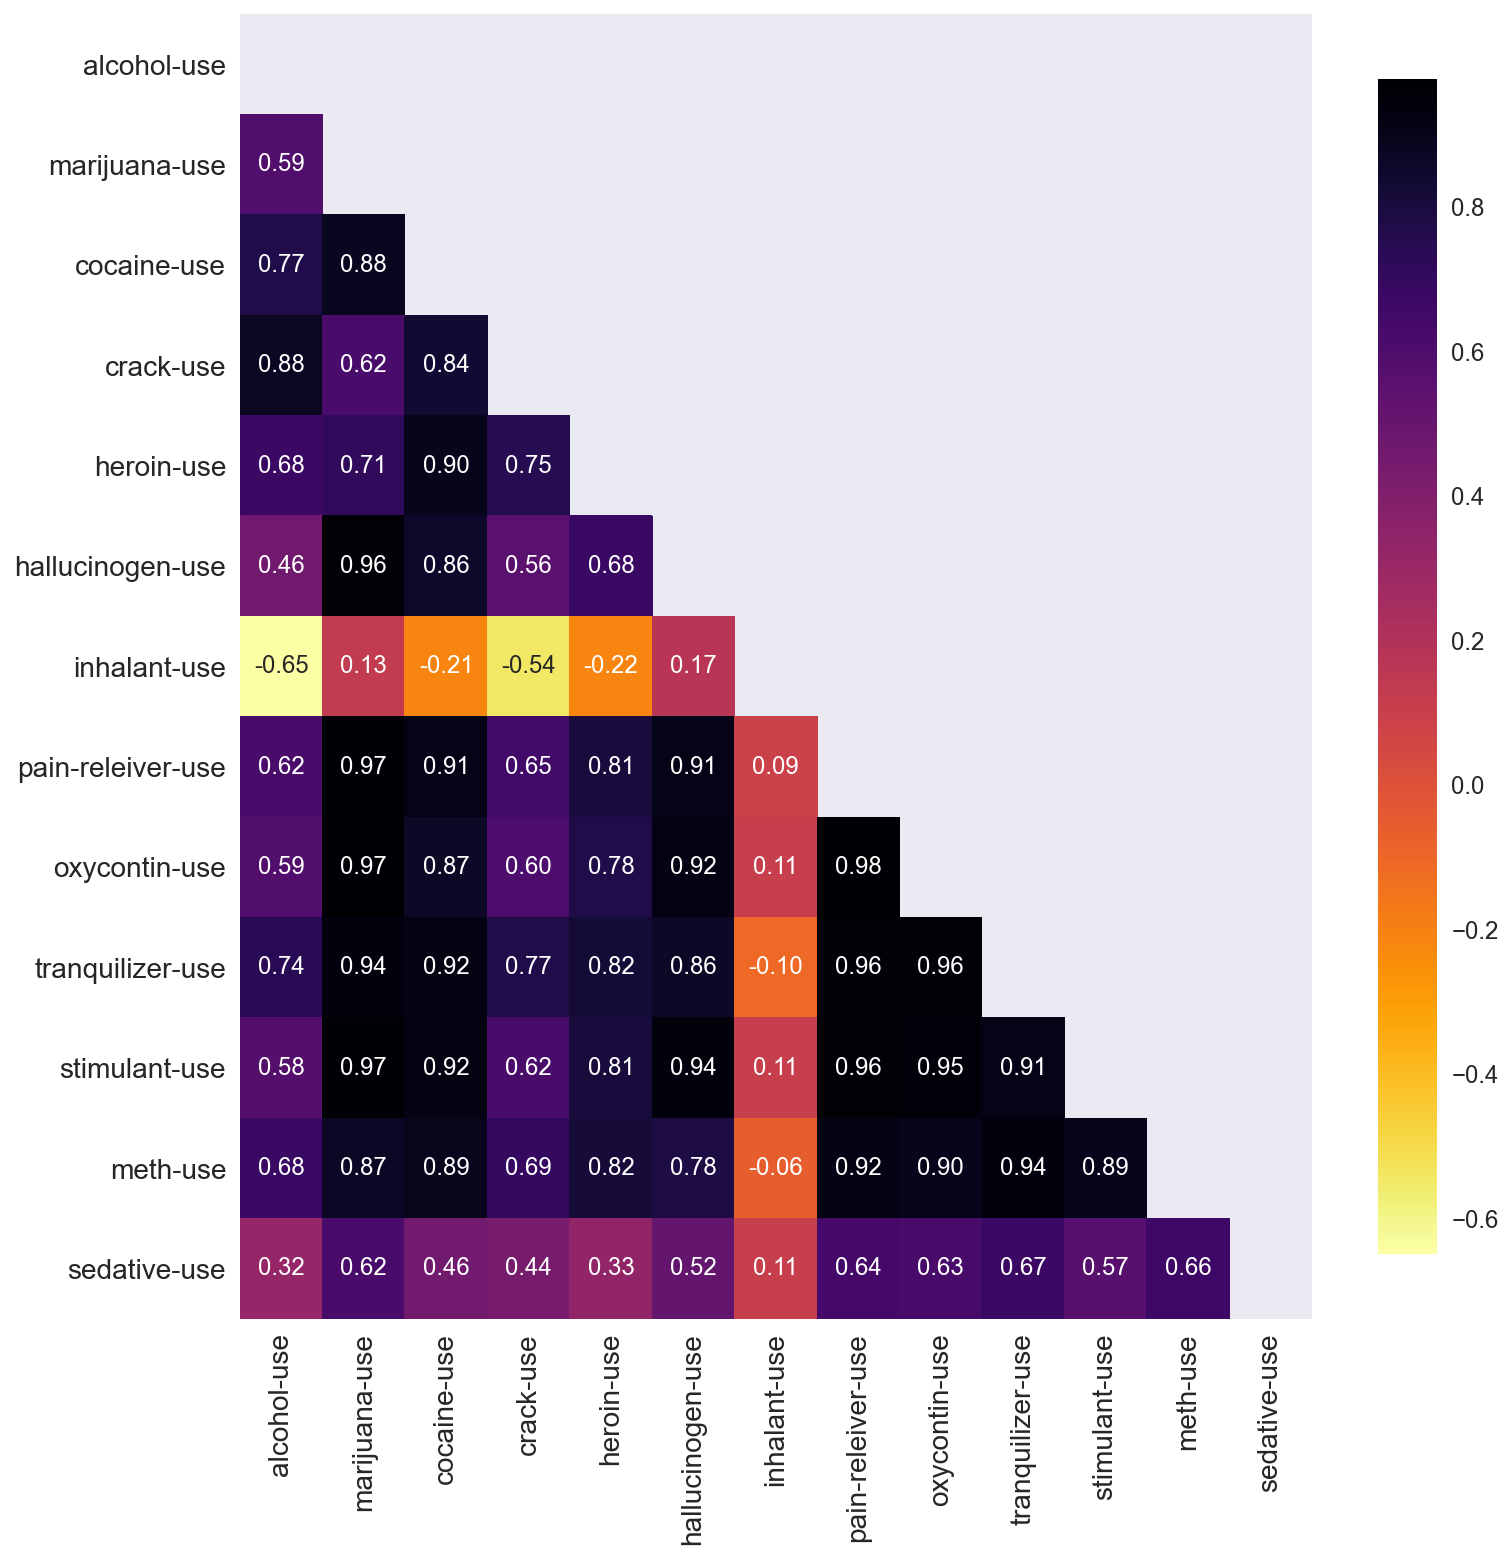

In [68]:
# Plot the drug usage correlations as a heatmap
mask = np.triu(np.ones_like(drugs_usage.corr(), dtype=bool))

fig, axs = plt.subplots(figsize=(12,12))
res = sns.heatmap(drugs_usage.corr(), 
            cmap= sns.color_palette('inferno_r', as_cmap=True),
            fmt=".2f", 
            annot=True,
            annot_kws={"fontsize":12},
            cbar_kws={"shrink": .9},
            mask = mask
            )
#modify the axis labels
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)

cbar = axs.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.savefig('Drugs_corr.png')
plt.show()

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

### Hypothesis 1 :
- Are Oxycontin and Heroin use linked
    - **H0** : No correlation between Oxycontin and Heroin
    - **H1** : Usgae of the two drugs is correlated


- **Result:**
    - P-value is very low, indicates that the null hypothesis can be **rejected with 99% certainty.**

In [69]:
## correlation between Oxy and Heroin

output = stats.pearsonr(drugs_usage['heroin-use'],drugs_usage['oxycontin-use'])

print("Pearson correlation coef: {}\nP-value: {}".format(round(output[0],3), round(output[1],5)))

Pearson correlation coef: 0.775
P-value: 0.00026


### Hypothesis 2 :
- Does alchol usage change as people age out of their 20's
    - **H0** : Alchol usage for people between 20-29 is equal to usage for people 30+
    - **H1** : Alcohol usage changes for people 30+


- **Result:**
    - P-value is higher than 0.05, indicates that the null hypothesis **cannot be rejected.**

In [70]:
# Check on sample variances:

sample_var_1 = round(drugs_usage.loc[['20', '21','22-23', '24-25', '26-29'],'alcohol-use'].var(),3)
sample_var_2 = round(drugs_usage.loc[['30-34', '35-49', '50-64', '65+'],'alcohol-use'].var(),3)

if sample_var_1 == sample_var_2:
    print('The sample variances are equal')
else:
    print('The sample variances are NOT equal')

print(sample_var_1, sample_var_2)


The sample variances are NOT equal
35.977 162.443


In [71]:
## test to see if Alcohol usage changes between age groups
## sample variances are greatly different - equal_var parameter adjusted accordingly

output_2 = stats.ttest_ind(drugs_usage.loc[['20', '21','22-23', '24-25', '26-29'],'alcohol-use'], 
                           drugs_usage.loc[['30-34', '35-49', '50-64', '65+'],'alcohol-use'],
                          equal_var=False
                          )

print("P-value: {}".format(round(output_2[1],5)))

P-value: 0.13374


### Hypothesis 3 :
- Does marijuana usage change as people age out of their 20's
    - **H0** : Marijuana usage for people between 20-29 is equal to usage for people 30+
    - **H1** : Marijuana usage changes for people 30+


- **Result:**
    - P-value is low, indicates that the null hypothesis can be **rejected with 99% certainty.**

In [72]:
# Check on sample variances:

sample_var_1 = round(drugs_usage.loc[['20', '21','22-23', '24-25', '26-29'],'marijuana-use'].var(),3)
sample_var_2 = round(drugs_usage.loc[['30-34', '35-49', '50-64', '65+'],'marijuana-use'].var(),3)

if sample_var_1 == sample_var_2:
    print('The sample variances are equal')
else:
    print('The sample variances are NOT equal')

print(sample_var_1, sample_var_2)


The sample variances are NOT equal
30.592 40.109


In [73]:
## test to see if Marijuana usage changes between age groups
## sample variances are greatly different - equal_var parameter adjusted accordingly

output_2 = stats.ttest_ind(drugs_usage.loc[['20', '21','22-23', '24-25', '26-29'],'marijuana-use'], 
                          drugs_usage.loc[['30-34', '35-49', '50-64', '65+'],'marijuana-use'],
                          equal_var=False
                          )

print("P-value: {}".format(round(output_2[1],5)))

P-value: 0.00282


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [74]:
# correlation matrix of the SAT data -- using the Spearman method
sat_mat_spear = df_sat[['Rate','Verbal','Math']].corr(method='spearman')
sat_mat_spear

,Rate,Verbal,Math
Rate,1.000000,-0.836058,-0.811662
Verbal,-0.836058,1.000000,0.909413
Math,-0.811662,0.909413,1.000000


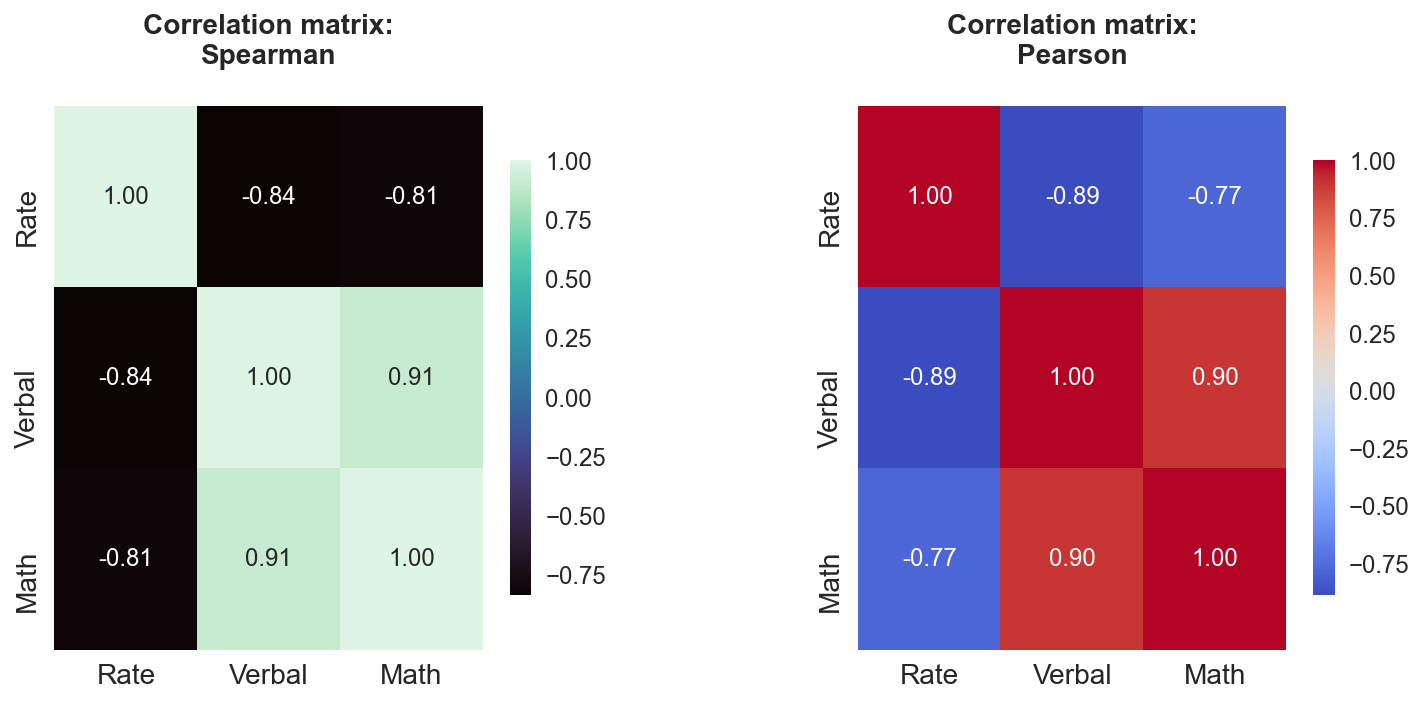

In [75]:
# SAT correlation matrix plotted as a heatmap
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

res1 = sns.heatmap(sat_mat_spear, 
            cmap= sns.color_palette("mako", as_cmap=True),
            fmt=".2f", 
            annot=True, 
            cbar_kws={"shrink": .8},
            annot_kws={"fontsize":12},
            ax=ax1,
            )

res2 = sns.heatmap(sat_mat, 
            cmap= sns.color_palette("coolwarm", as_cmap=True),
            fmt=".2f", 
            annot=True, 
            cbar_kws={"shrink": .8},
            annot_kws={"fontsize":12},
            ax=ax2
            )

ax1.set_title('Correlation matrix:\nSpearman\n', fontdict={'fontsize':14, 'weight':'bold'})
ax2.set_title('Correlation matrix:\nPearson\n', fontdict={'fontsize':14, 'weight':'bold'})

#modify the axis labels
res1.set_xticklabels(res1.get_xmajorticklabels(), fontsize = 14)
res1.set_yticklabels(res1.get_ymajorticklabels(), fontsize = 14)
res2.set_xticklabels(res2.get_xmajorticklabels(), fontsize = 14)
res2.set_yticklabels(res2.get_ymajorticklabels(), fontsize = 14)

# modify the cbar text
cbar = res1.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar = res2.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)



plt.subplots_adjust(wspace=0.5)     #modify the spacing between the plot
plt.show()

#### Rus' Notes:
- For this data set, the Pearson and Spearman correlation coef's are similar and provide the same insights on the data, i.e. both methods are showing the same directionality and approxiamtely the same strength.


- The Pearson correlation coef should only be applied when the data adhere's to particular assumptions, such as the vaiables being normally distributed and linearity between them.
- The assumptions regarding the use of the Spearman coef is less restrictive and can be used on non-normally distrubted data.


- The Spearman coef is calculated based on the differences in the ranked scores for each variable.
    - In the SAT example, the 'Rate', 'Verbal' and 'Math' values would be individually ranked based on their magnitude
    - Correlation is then calculated based on the differences of the *rankings* of each data point

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [76]:
# copy SAT DF so a fresh var can be meddled with 
sat_perc = df_sat[['State','Rate']].copy()
sat_perc.head()

,State,Rate
0,CT,82
1,NJ,81
2,MA,79
3,NY,77
4,NH,72


In [77]:
# create a list of the percentile scores
percentiles = [stats.percentileofscore(sat_perc['Rate'],x) for x in sat_perc['Rate']]

# Add new column/series to the DF with the percentile scores
sat_perc['Percentile'] = percentiles
sat_perc.head()

,State,Rate,Percentile
0,CT,82,100.000000
1,NJ,81,98.039216
2,MA,79,96.078431
3,NY,77,94.117647
4,NH,72,92.156863


In [78]:
# Slice out the Californian percentile ranking
sat_perc.loc[(sat_perc['State'] == 'CA')]

,State,Rate,Percentile
23,CA,51,55.882353


### Rus' Notes:
- Percetile scores of a variable are essentially a ranking of each data point within that given series.
- This is related to the Spearman correlation which also ranks each data point within a given series, and then calculates a correlation between the rankings of a bivariate study.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.